In [1]:
import manify
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
FIGSIZE = (15, 12)

In [3]:
# def get_deltas(pm, n_samples=100, variance=1, mu_norm=0):
#     if mu_norm:
#         vec = torch.zeros(pm.ambient_dim)
#         vec[1] = mu_norm  # Don't do 0 cause that dimension is weird
#         mu = pm.expmap(vec)
#     else:
#         mu = pm.mu0
#     X, _ = pm.sample(
#         z_mean=torch.stack([mu] * n_samples),
#         sigma_factorized=[torch.stack([torch.eye(pm.dim) * variance] * n_samples)],
#     )
#     D = pm.pdist(X)
#     return manify.vectorized_delta_hyperbolicity(D, full=True).detach().numpy().flatten()


# DIMS = [2, 4, 6, 8, 10, 12, 14, 16, 32, 64, 128, 256, 512]
# CURVS = [-4, -2, -1, -0.5, -0.25, 0, 0.25, 0.5, 1, 2, 4]
# NORMS = [0, 0.01, 0.1, 1, 10]
# VARIANCES = [0.0625, 0.125, 0.25, 0.5, 1]
# SAMPLES = [5, 10, 25, 50, 100]
# TRIALS = 10

# my_tqdm = tqdm(total=len(DIMS) * len(CURVS) * len(NORMS) * len(VARIANCES) * len(SAMPLES) * TRIALS)
# deltas = pd.DataFrame(
#     columns=[
#         "d",
#         "K",
#         "norm",
#         "sigma",
#         "n",
#         "trial",
#         "delta_max",
#         "delta_mean",
#         "delta_abs_max",
#         "delta_abs_mean",
#         "delta_std",
#         "delta_abs_std",
#     ]
# )
# for dim in DIMS:
#     for K in CURVS:
#         pm = manify.ProductManifold(signature=[(K, dim)])
#         for norm in NORMS:
#             for var in VARIANCES:
#                 for n_samples in SAMPLES:
#                     for i in range(TRIALS):
#                         my_deltas = get_deltas(pm, n_samples=n_samples, variance=var, mu_norm=norm)
#                         deltas.loc[len(deltas)] = [
#                             dim,
#                             K,
#                             norm,
#                             var,
#                             n_samples,
#                             i,
#                             np.max(my_deltas),
#                             np.mean(my_deltas),
#                             np.max(np.abs(my_deltas)),
#                             np.mean(np.abs(my_deltas)),
#                             np.std(my_deltas),
#                             np.std(np.abs(my_deltas)),
#                         ]
#                         my_tqdm.update(1)

# deltas.to_csv("~/Downloads/deltas.csv")

deltas = pd.read_csv("~/Downloads/deltas.csv", index_col=0)

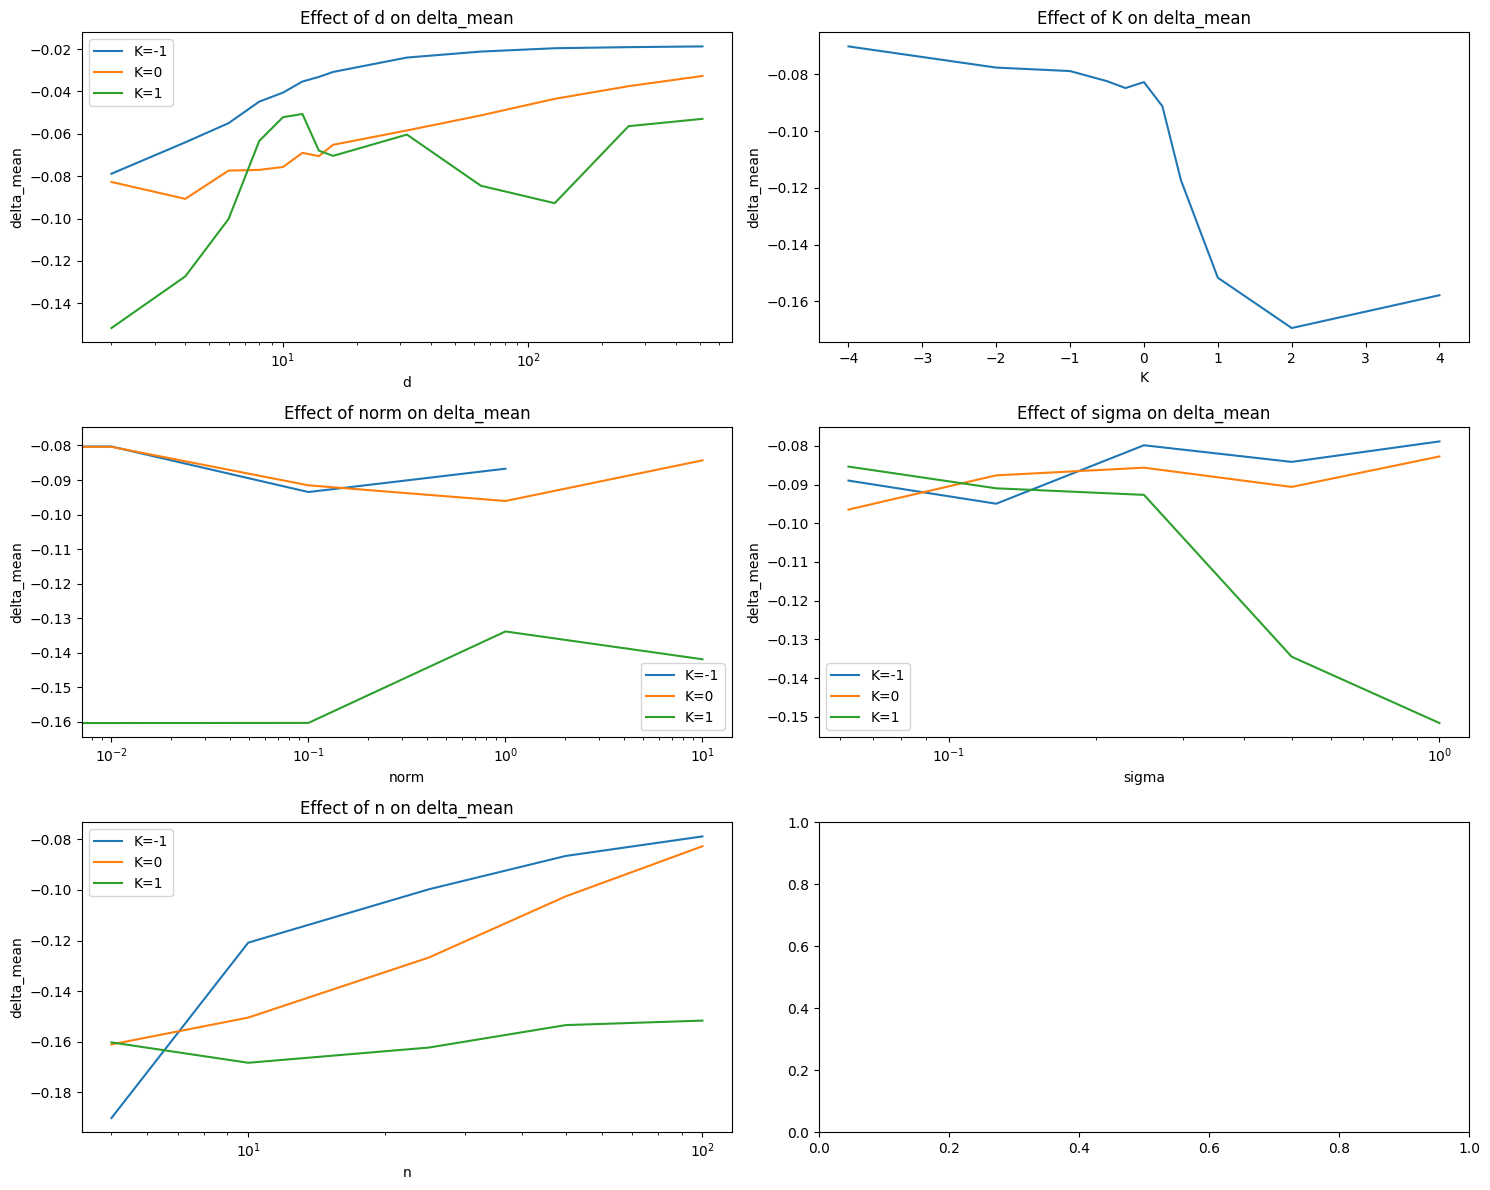

In [6]:
# Plot the effect of each variable on delta_mean

COL = "delta_mean"
# COL = "delta_max"
VARS = ["d", "K", "norm", "sigma", "n"]
DEFAULTS = {"d": 2, "K": -1, "norm": 0, "sigma": 1, "n": 100}
K_VALUES = [-1, 0, 1]  # Values of K to compare

fig, axs = plt.subplots(3, 2, figsize=FIGSIZE)
for var, ax in zip(VARS, axs.flatten()):
    ax.set_title(f"Effect of {var} on {COL}")

    if var == "K":
        # For K plot, use the defaults for other variables
        df_filtered = deltas.copy()
        for filter_var in VARS:
            if filter_var != var:
                df_filtered = df_filtered[df_filtered[filter_var] == DEFAULTS[filter_var]]

        df_grouped = df_filtered.groupby(var).mean()
        ax.plot(df_grouped.index, df_grouped[COL])

    else:
        # For other variables, plot multiple lines for different K values
        for k_val in K_VALUES:
            df_filtered = deltas.copy()
            for filter_var in VARS:
                if filter_var == var:
                    continue  # Skip the variable we're plotting on x-axis
                elif filter_var == "K":
                    df_filtered = df_filtered[df_filtered[filter_var] == k_val]
                else:
                    df_filtered = df_filtered[df_filtered[filter_var] == DEFAULTS[filter_var]]

            df_grouped = df_filtered.groupby(var).mean()
            ax.plot(df_grouped.index, df_grouped[COL], label=f"K={k_val}")

        ax.legend()

    # Improve axis labels
    ax.set_xlabel(var)
    ax.set_ylabel(COL)

    # Use log scale for dimension
    if var != "K":
        ax.set_xscale("log")
        # ax.set_yscale("log")

plt.tight_layout()

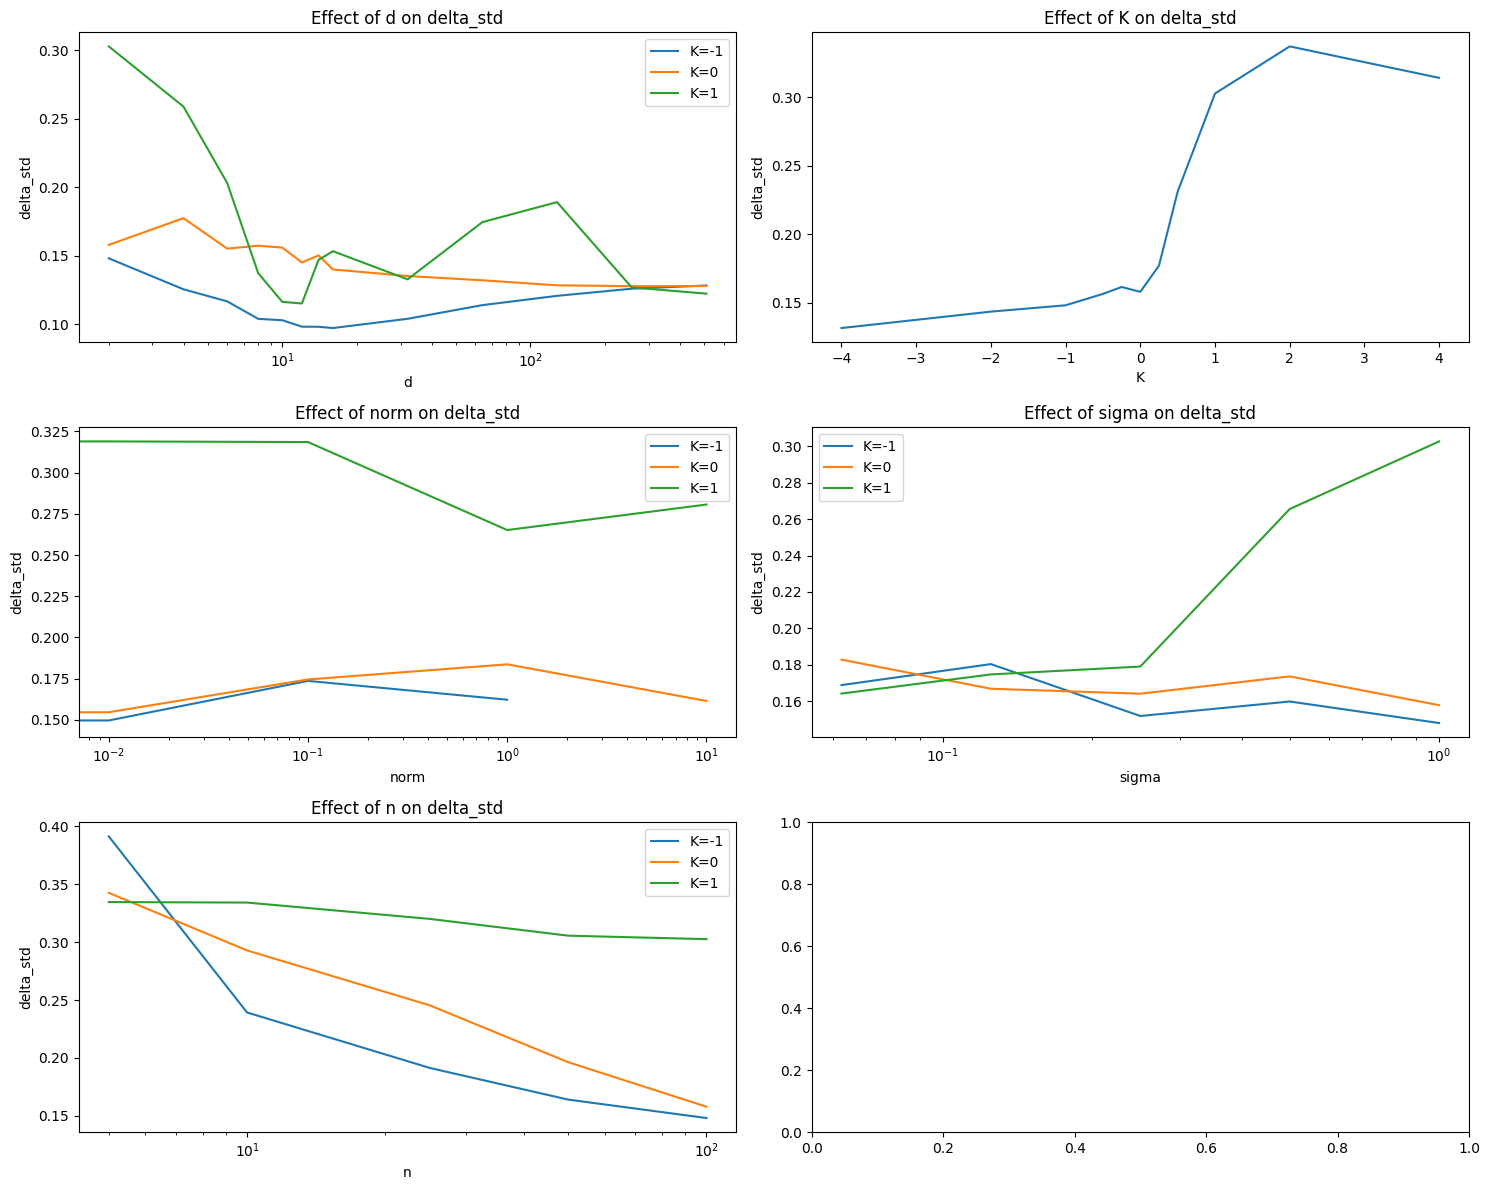

In [9]:
# Plot the effect of each variable on delta_mean

COL = "delta_std"
# COL = "delta_max"
VARS = ["d", "K", "norm", "sigma", "n"]
DEFAULTS = {"d": 2, "K": -1, "norm": 0, "sigma": 1, "n": 100}
K_VALUES = [-1, 0, 1]  # Values of K to compare

fig, axs = plt.subplots(3, 2, figsize=FIGSIZE)
for var, ax in zip(VARS, axs.flatten()):
    ax.set_title(f"Effect of {var} on {COL}")

    if var == "K":
        # For K plot, use the defaults for other variables
        df_filtered = deltas.copy()
        for filter_var in VARS:
            if filter_var != var:
                df_filtered = df_filtered[df_filtered[filter_var] == DEFAULTS[filter_var]]

        df_grouped = df_filtered.groupby(var).mean()
        ax.plot(df_grouped.index, df_grouped[COL])

    else:
        # For other variables, plot multiple lines for different K values
        for k_val in K_VALUES:
            df_filtered = deltas.copy()
            for filter_var in VARS:
                if filter_var == var:
                    continue  # Skip the variable we're plotting on x-axis
                elif filter_var == "K":
                    df_filtered = df_filtered[df_filtered[filter_var] == k_val]
                else:
                    df_filtered = df_filtered[df_filtered[filter_var] == DEFAULTS[filter_var]]

            df_grouped = df_filtered.groupby(var).mean()
            ax.plot(df_grouped.index, df_grouped[COL], label=f"K={k_val}")

        ax.legend()

    # Improve axis labels
    ax.set_xlabel(var)
    ax.set_ylabel(COL)

    # Use log scale for dimension
    if var != "K":
        ax.set_xscale("log")
        # ax.set_yscale("log")

plt.tight_layout()

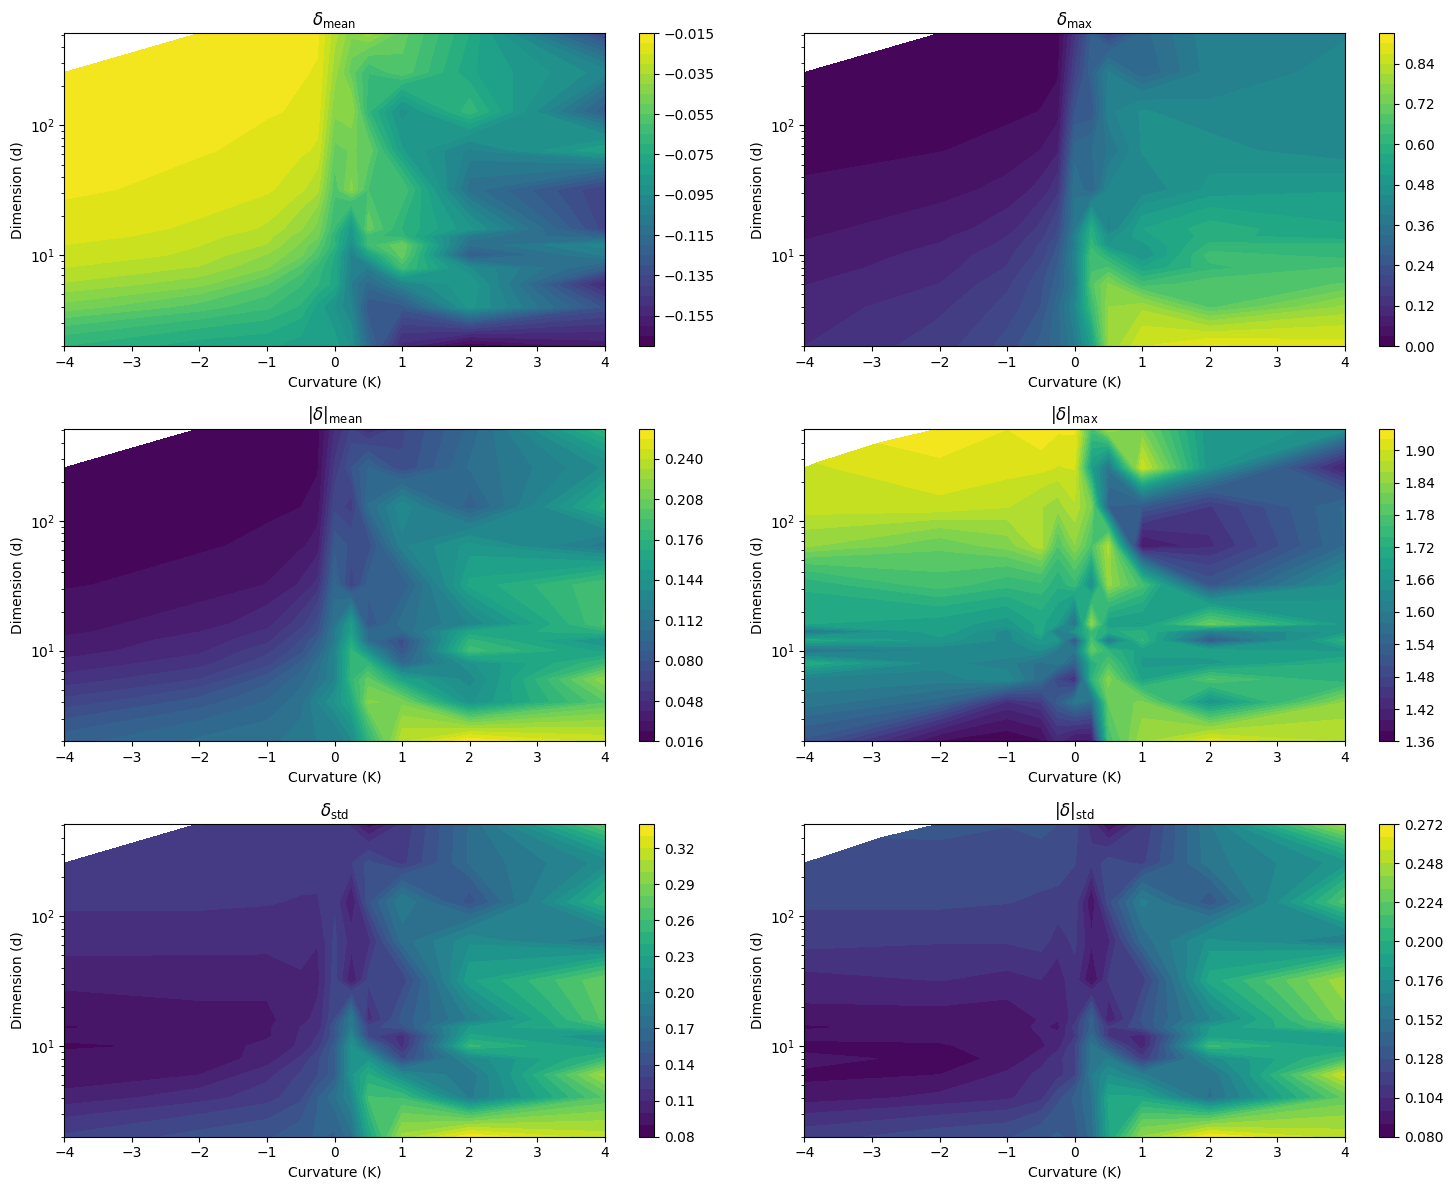

In [10]:
metrics = ["delta_mean", "delta_max", "delta_abs_mean", "delta_abs_max", "delta_std", "delta_abs_std"]
names = [
    r"$\delta_\text{mean}$",
    r"$\delta_\text{max}$",
    r"$|\delta|_\text{mean}$",
    r"$|\delta|_\text{max}$",
    r"$\delta_\text{std}$",
    r"$|\delta|_\text{std}$",
]

fig, axs = plt.subplots(3, 2, figsize=FIGSIZE)
for metric, ax, name in zip(metrics, axs.flatten(), names):
    piv = deltas[(deltas[["n", "sigma", "norm"]] == (100, 1, 0)).all(axis=1)].pivot_table(
        index="d", columns="K", values=metric
    )
    X = piv.columns.astype(float)
    Y = piv.index.astype(float)
    Z = piv.values

    cs = ax.contourf(X, Y, Z, levels=30, cmap="viridis")
    fig.colorbar(cs, ax=ax)

    ax.set_xscale("linear")
    ax.set_yscale("log")
    ax.set_xlabel("Curvature (K)")
    ax.set_ylabel("Dimension (d)")
    ax.set_title(name)

plt.tight_layout()
plt.show()

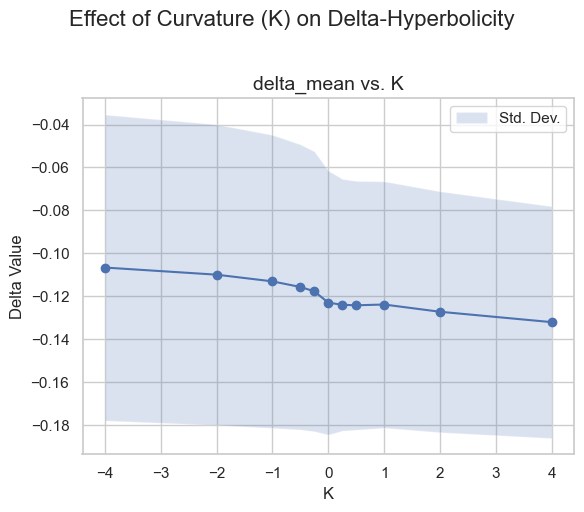

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the data from the URL
url = "https://raw.githubusercontent.com/pchlenski/delta/refs/heads/main/deltas.csv"
df = pd.read_csv(url)

# Clean up the dataframe
df = df.rename(columns={"Unnamed: 0": "id"})
df = df.dropna()

# Set plot style
sns.set_theme(style="whitegrid")


def plot_relationship(df, x_var, y_vars, title_suffix, log_x=False, filter_K_type=None):
    """
    Helper function to plot the relationship between an independent variable and delta metrics.
    Groups data by the x_var and plots the mean of the y_vars with a shaded standard deviation.
    """
    fig, ax = plt.subplots(1, len(y_vars), figsize=(6 * len(y_vars), 5), sharey=True)
    if len(y_vars) == 1:
        ax = [ax]  # Make it iterable

    for i, y_var in enumerate(y_vars):
        plot_df = df.copy()
        # Optional filter for curvature type
        if filter_K_type == "hyperbolic":
            plot_df = df[df["K"] < 0]
        elif filter_K_type == "spherical":
            plot_df = df[df["K"] > 0]

        # Group by the independent variable and calculate mean/std for the dependent variable
        grouped = plot_df.groupby(x_var)[y_var].agg(["mean", "std"]).reset_index()

        ax[i].plot(grouped[x_var], grouped["mean"], marker="o", linestyle="-")
        ax[i].fill_between(
            grouped[x_var],
            grouped["mean"] - grouped["std"],
            grouped["mean"] + grouped["std"],
            alpha=0.2,
            label="Std. Dev.",
        )

        ax[i].set_xlabel(x_var, fontsize=12)
        if i == 0:
            ax[i].set_ylabel("Delta Value", fontsize=12)
        ax[i].set_title(f"{y_var} vs. {x_var}", fontsize=14)
        if log_x:
            ax[i].set_xscale("log")
        ax[i].legend()

    plt.suptitle(f"Effect of {title_suffix} on Delta-Hyperbolicity", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


plot_relationship(df, "K", ["delta_mean"], "Curvature (K)")

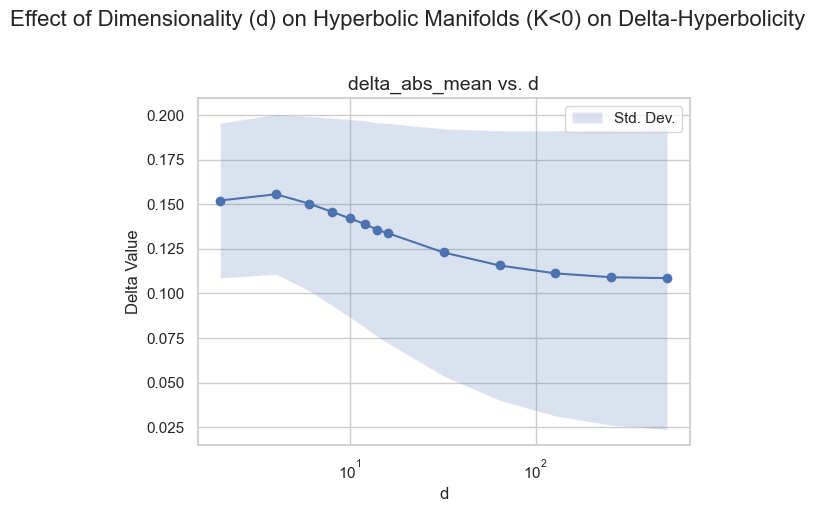

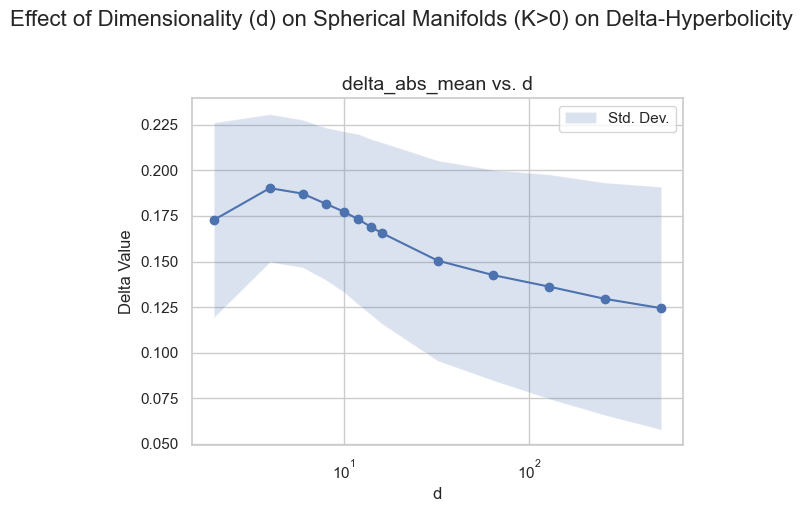

In [ ]:
plot_relationship(
    df,
    "d",
    ["delta_abs_mean"],
    "Dimensionality (d) on Hyperbolic Manifolds (K<0)",
    log_x=True,
    filter_K_type="hyperbolic",
)
plot_relationship(
    df,
    "d",
    ["delta_abs_mean"],
    "Dimensionality (d) on Spherical Manifolds (K>0)",
    log_x=True,
    filter_K_type="spherical",
)

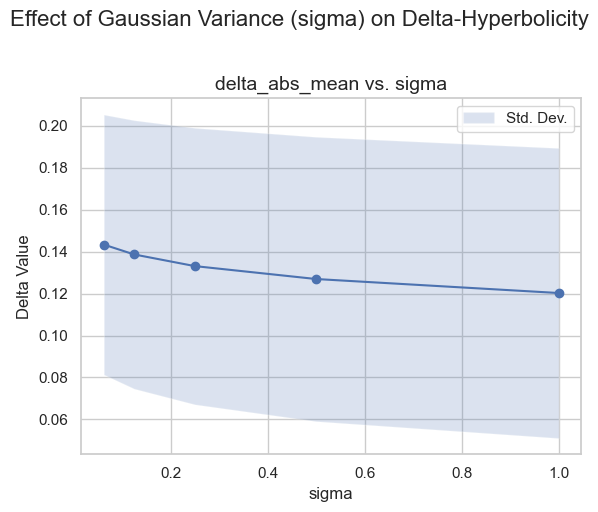

In [ ]:
plot_relationship(df, "sigma", ["delta_abs_mean"], "Gaussian Variance (sigma)", filter_K_type="hyperbolic")

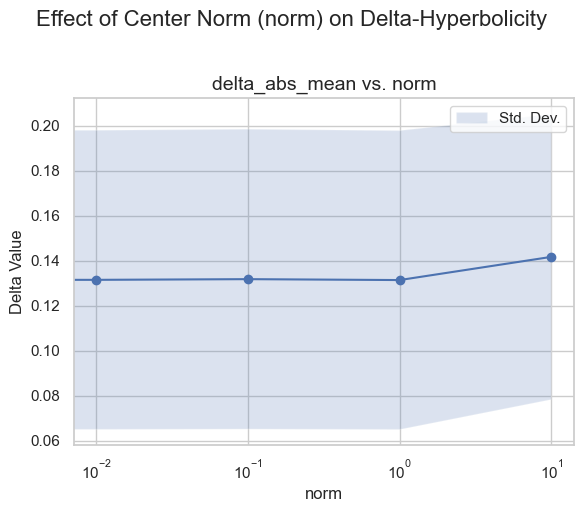

In [ ]:
plot_relationship(df, "norm", ["delta_abs_mean"], "Center Norm (norm)", log_x=True, filter_K_type="hyperbolic")

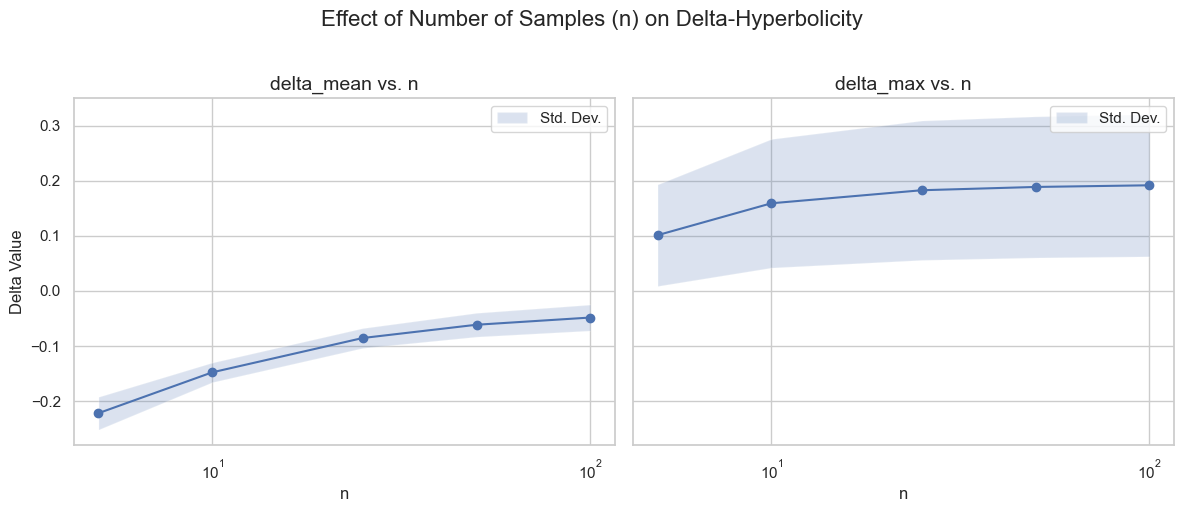

In [ ]:
plot_relationship(df, "n", ["delta_mean", "delta_max"], "Number of Samples (n)", log_x=True, filter_K_type="hyperbolic")

In [ ]:
# Create transformed variables for the model
model_df = df.copy()
# Use abs(K) as the main curvature driver, add small epsilon for log
model_df["abs_K"] = np.abs(model_df["K"])
model_df["log_d"] = np.log(model_df["d"])
model_df["log_sigma"] = np.log(model_df["sigma"])
model_df["log_norm"] = np.log(model_df["norm"] + 1e-6)  # Epsilon for norm=0
model_df["log_n"] = np.log(model_df["n"])
model_df["log_delta_abs_mean"] = np.log(model_df["delta_abs_mean"] + 1e-9)  # Epsilon for delta=0

# Define the model formula
formula = (
    "log_delta_abs_mean ~ "
    "abs_K + log_d + log_sigma + log_norm + log_n + "
    "abs_K:log_d + abs_K:log_sigma"  # Interaction terms
)

# Fit the Ordinary Least Squares model
model = smf.ols(formula, data=model_df).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     log_delta_abs_mean   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                 3.251e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        01:13:14   Log-Likelihood:                -58459.
No. Observations:              168823   AIC:                         1.169e+05
Df Residuals:                  168815   BIC:                         1.170e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.6299      0.004   -1

In [ ]:
# The setup code from the previous response is assumed to have been run
# (loading data, defining plot_relationship helper function, etc.)

# Split the dataframe
df_hyperbolic = df[df["K"] <= 0].copy()
df_spherical = df[df["K"] >= 0].copy()

print(f"Hyperbolic/Euclidean samples: {len(df_hyperbolic)}")
print(f"Spherical/Euclidean samples: {len(df_spherical)}")

Hyperbolic/Euclidean samples: 87573
Spherical/Euclidean samples: 97500


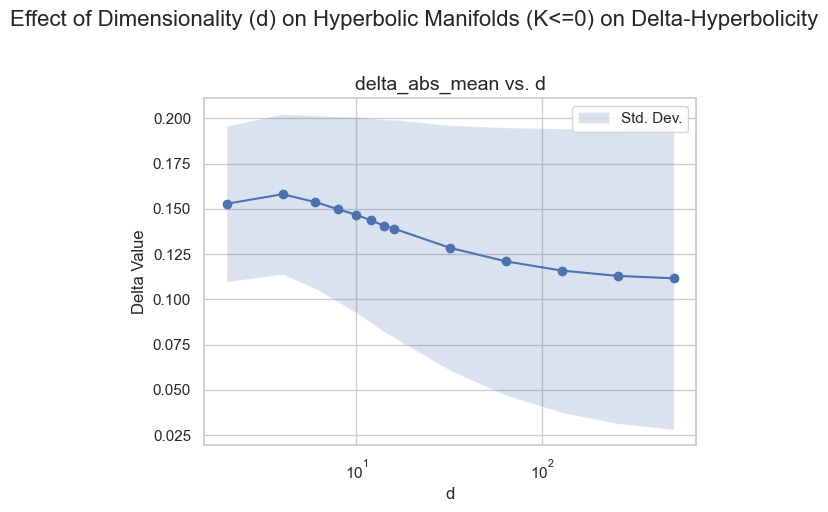

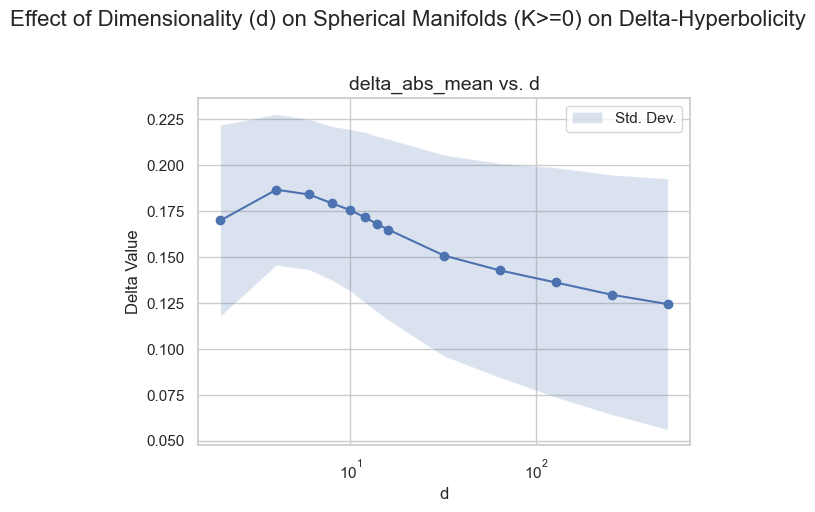

In [ ]:
# Re-using the plot_relationship function defined in the previous response
plot_relationship(
    df_hyperbolic, "d", ["delta_abs_mean"], "Dimensionality (d) on Hyperbolic Manifolds (K<=0)", log_x=True
)
plot_relationship(df_spherical, "d", ["delta_abs_mean"], "Dimensionality (d) on Spherical Manifolds (K>=0)", log_x=True)

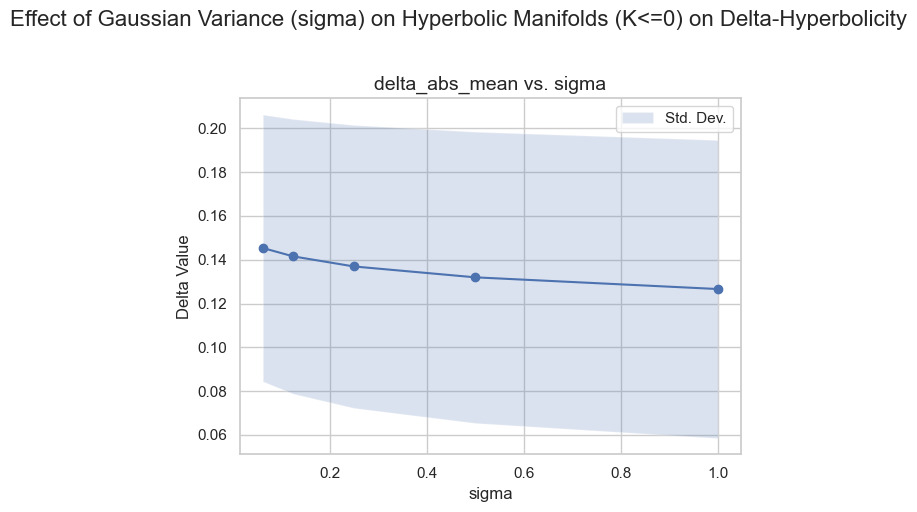

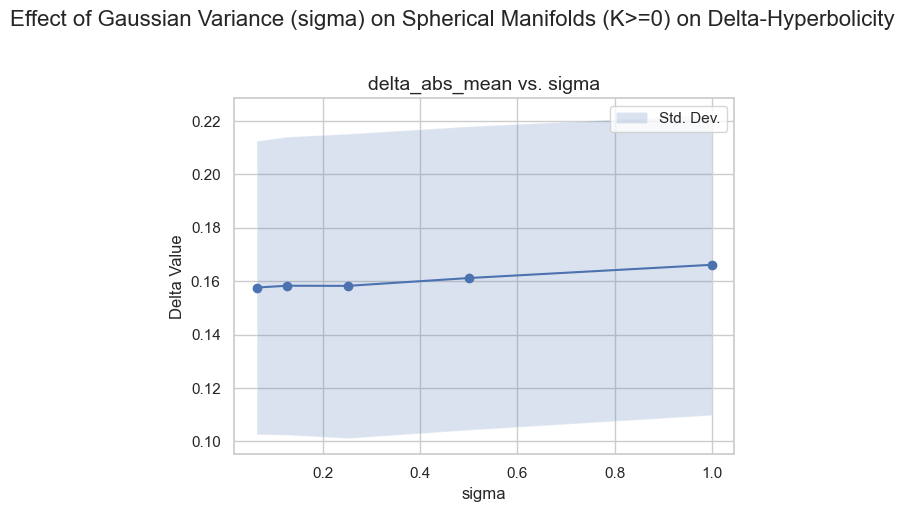

In [ ]:
plot_relationship(
    df_hyperbolic, "sigma", ["delta_abs_mean"], "Gaussian Variance (sigma) on Hyperbolic Manifolds (K<=0)"
)
plot_relationship(df_spherical, "sigma", ["delta_abs_mean"], "Gaussian Variance (sigma) on Spherical Manifolds (K>=0)")

In [37]:
df

,Unnamed: 0,d,K,norm,sigma,n,trial,delta_max,delta_mean,delta_abs_max,delta_abs_mean,delta_std,delta_abs_std,abs_K,log_abs_K,log_d,log_sigma
0,0,2.0,-4.0,0.0,0.0625,5.0,0.0,0.356044,-0.222216,2.000000,0.250318,0.438705,0.423300,4.0,1.386319,0.693147,-2.772589
1,1,2.0,-4.0,0.0,0.0625,5.0,1.0,0.147396,-0.155385,2.000000,0.171318,0.335217,0.327361,4.0,1.386319,0.693147,-2.772589
2,2,2.0,-4.0,0.0,0.0625,5.0,2.0,0.077345,-0.241864,2.000000,0.247315,0.490871,0.488148,4.0,1.386319,0.693147,-2.772589
3,3,2.0,-4.0,0.0,0.0625,5.0,3.0,0.401729,-0.198814,1.846844,0.227786,0.393135,0.377088,4.0,1.386319,0.693147,-2.772589
4,4,2.0,-4.0,0.0,0.0625,5.0,4.0,0.279749,-0.194695,1.410722,0.213009,0.373831,0.363707,4.0,1.386319,0.693147,-2.772589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178745,178745,512.0,4.0,10.0,1.0000,100.0,5.0,0.349225,-0.122656,1.720561,0.155449,0.256925,0.238517,4.0,1.386319,6.238325,0.000000
178746,178746,512.0,4.0,10.0,1.0000,100.0,6.0,0.342946,-0.116883,1.480546,0.155742,0.229896,0.205568,4.0,1.386319,6.238325,0.000000
178747,178747,512.0,4.0,10.0,1.0000,100.0,7.0,0.470456,-0.098715,1.180167,0.140086,0.198077,0.171333,4.0,1.386319,6.238325,0.000000
178748,178748,512.0,4.0,10.0,1.0000,100.0,8.0,0.436875,-0.084050,1.306921,0.122097,0.176281,0.152419,4.0,1.386319,6.238325,0.000000


In [ ]:
from gplearn.genetic import SymbolicRegressor
from gplearn._program import _Program
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load and preprocess
df = pd.read_csv("~/Downloads/deltas.csv")
df = df[df["K"] <= 0].dropna(subset=["delta_abs_std", "norm", "n"])

df["abs_K"] = np.abs(df["K"])
df["log_d"] = np.log(df["d"])
df["log_sigma"] = np.log(df["sigma"])
df["log_abs_K"] = np.log(df["abs_K"] + 1e-4)
df["log_n"] = np.log(df["n"])
df["log_norm"] = np.log(np.abs(df["norm"]) + 1e-4)

X = df[["d", "sigma", "K", "abs_K", "log_d", "log_sigma", "log_abs_K", "n", "log_n", "norm", "log_norm"]].values
y = df["delta_abs_std"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: train once to initialize function set
est = SymbolicRegressor(
    population_size=1000,
    generations=50,
    init_depth=(3, 5),
    function_set=["add", "sub", "mul", "div", "log", "sqrt"],
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    parsimony_coefficient=0.001,
    random_state=42,
)

# Dummy fit to build internals
est.fit(X_train, y_train)

# Step 2: create and inject seed expression
seed_expr = "add(mul(log_abs_K, 0.5), mul(log_sigma, 1.2))"
seed_prog = _Program(
    program=seed_expr,
    function_set=est.function_set,
    arities={f.name: f.arity for f in est._function_set},
    init_depth=(3, 5),
    init_method="half and half",
    metric="mean absolute error",
    const_range=(-1.0, 1.0),
    p_point_replace=0.05,
    random_state=42,
    feature_names=["d", "sigma", "K", "abs_K", "log_d", "log_sigma", "log_abs_K", "n", "log_n", "norm", "log_norm"],
)

# Replace best program with seed
est._program = seed_prog

# Step 3: retrain from seeded start
est.fit(X_train, y_train)

# Step 4: evaluate
y_pred = est.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("\nBest symbolic expression:")
print(est._program)
print(f"Test R²: {r2:.4f}")

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    12.28          96546.5        2         0.125245         0.125705      2.56m
   1     9.33          10.7011       15        0.0661933        0.0666601      2.20m
   2     9.83          4.53187       19        0.0308051        0.0300707      2.17m
   3    10.49          3.40162       20        0.0307089        0.0309365      2.09m
   4    14.99          1.88499       19        0.0306494        0.0314722      2.55m
   5    14.95          78.3949       36        0.0306254        0.0316888      2.77m
   6    11.21          1.94581       15        0.0306272         0.031672      2.29m
   7     9.62          2.17741       10        0.0306329        0.0316212      1.94m
   8     8.01          33.2541        8         0.030622        0.0317187  

TypeError: _Program.__init__() missing 2 required positional arguments: 'n_features' and 'parsimony_coefficient'